In [54]:
from datasets import load_titanic, balance_classes
from tools import model_performance, confusion_matrix
from sklearn.metrics import plot_roc_curve
import pandas as pd

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [55]:
df, df_train, df_test = load_titanic()
df_train.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'target'], dtype='object')

In [56]:
df_train_balanced = balance_classes(df_train)

In [57]:
original_X = df.drop(['target'], axis=1)
original_y = df['target']
train_X = df_train.drop(['target'], axis=1)
train_X_balanced = df_train_balanced.drop(['target'], axis=1)
train_y_balanced = df_train_balanced['target']
train_y = df_train['target']
test_X = df_test.drop(['target'], axis=1)
test_y = df_test['target']

In [58]:
original_X = pd.get_dummies(original_X)
train_X = pd.get_dummies(train_X)
train_X_balanced = pd.get_dummies(train_X_balanced)
test_X = pd.get_dummies(test_X)

features = train_X.columns

In [59]:
# kvuli konvergenci
scaler = StandardScaler().fit(train_X)
original_X = scaler.transform(original_X)
train_X = scaler.transform(train_X)
train_X_balanced = scaler.transform(train_X_balanced)
test_X = scaler.transform(test_X)

In [60]:
model = SVC(kernel='linear', shrinking=False)
scores = cross_val_score(model, original_X, original_y, cv=80)
scores.mean()

0.7866477272727274

In [61]:
# if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
# Degree of the polynomial kernel function (‘poly’). default 3
model = SVC(kernel='poly', shrinking=False)
scores = cross_val_score(model, original_X, original_y, cv=80)
scores.mean()

0.8205492424242424

In [62]:
# if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
model = SVC(kernel='rbf', shrinking=False)
scores = cross_val_score(model, original_X, original_y, cv=80)
scores.mean()

0.8208333333333334

In [63]:
model = SVC(kernel='rbf', shrinking=False)
model = model.fit(train_X, train_y)

In [64]:
model_performance(model, train_X, train_y, test_X, test_y)

Train score
0.898876404494382
Test score
0.7741935483870968


In [65]:
confusion_matrix(model.predict(train_X), train_y, model.predict(test_X), test_y)

Train
TN: 91, TP: 69, FN: 10, FP: 8
Test
TN: 374, TP: 178, FN: 85, FP: 76


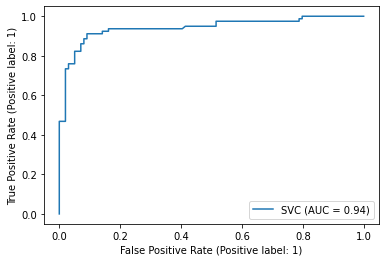

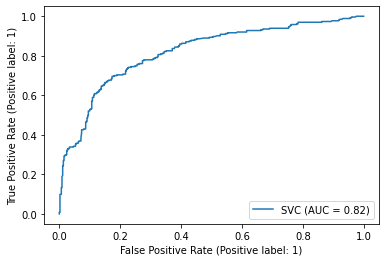

In [66]:
plot_roc_curve(model, train_X, train_y)
plot_roc_curve(model, test_X, test_y)

In [67]:
model = SVC(kernel='rbf', shrinking=False)
model = model.fit(train_X_balanced, train_y_balanced)

In [68]:
model_performance(model, train_X_balanced, train_y_balanced, test_X, test_y)

Train score
0.8860759493670886
Test score
0.7657784011220197


In [70]:
confusion_matrix(model.predict(train_X_balanced), train_y_balanced, model.predict(test_X), test_y)

Train
TN: 71, TP: 69, FN: 10, FP: 8
Test
TN: 361, TP: 185, FN: 78, FP: 89


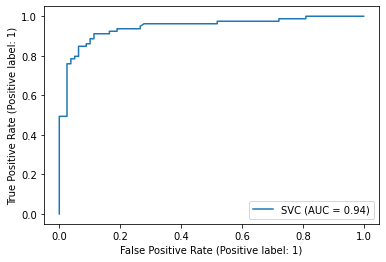

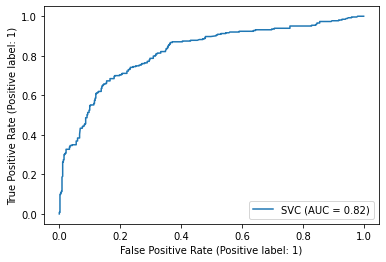

In [71]:
plot_roc_curve(model, train_X_balanced, train_y_balanced)
plot_roc_curve(model, test_X, test_y)